# Lecture 7

### Use principal components for visualizations... maybe that's about it...

- Idea: Use fourier transforms to fit volume daily data at capmon
 - Can reduce to 4 coefficients in fourier space instead of one value every hour to approximate the volume trend
- Try local regression (smooth kernel) for predicting hourly peak volume based on daily average
     - See lecture notes for this one (he went through it pretty quickly)
     - kernels are the weighting scheme
         - "Nearest neighbors kernel" for example
         - Most people use gaussian kernel
         - In theory the best should be Epanechnikov kernel but for some reason people don't use it...

## Polynomial Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wage = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 6\Wage.csv", index_col=0)
wage = wage.reset_index(drop=True)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
X = []
for i in range(1, 6):
    X.append(PolynomialFeatures(i).fit_transform(wage[['age']]))

### NOTE:
- What we're doing below is a type of regression when your inputs X affect the class y in a way that isn't linear or logistic (ie age affects salary in a weird way because early and late in your life it's low but it's large in the middle - logistic or linear regression wouldn't be able to capture this... but that's why we have generalized linear regression....)

In [5]:
import statsmodels.api as sm

In [6]:
y = [1.0 if x>250 else 0 for x in wage['wage']]
lr = sm.GLM(y, X[3],
           family=sm.families.Binomial(sm.families.links.logit))
lr = lr.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.61
Date:                Tue, 27 Nov 2018   Deviance:                       701.22
Time:                        19:57:02   Pearson chi2:                 3.70e+03
No. Iterations:                    10   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -109.5530     47.655     -2.299      0.022    -202.956     -16.150
x1             8.9950      4.187      2.148      0.032       0.789      17.201
x2            -0.2816      0.135     -2.081      0.037      -0.547      -0.016
x3             0.0039      0.002      2.022      0.043       0.000       0.008
x4         -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05   -6.41e-08
==============================================================================
"""

In [7]:
age_grid = np.arange(20, 80).reshape(-1,1)
X_test = PolynomialFeatures(4).fit_transform(age_grid)
y_hat = lr.predict(X_test)

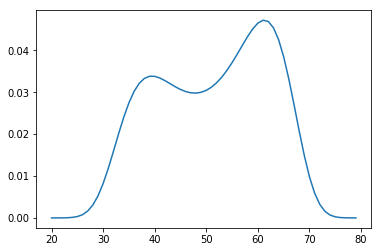

In [8]:
plt.plot(age_grid, y_hat)

### Use one of these methods if not voice or image recognition:
- CART
- Bagging
- Boosting

### THATS WHY THIS IS THE MOST IMPORTANT LECTURE

# CART (Classification and Regression Trees)

- Approximating logistic regression with step functions
- Cutting up vectorspace to minimize errors with a series of binary operations
- The most important variables are at the "top" of the tree (ie the first binary operation you'd need to do)

In [9]:
spam = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 6\spamdata.csv")
spam.columns = spam.columns.str.strip()

In [10]:
spam.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,parentheses,backet,exclamation,dollar,sharp,length_average,length_longest,length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### Looks like a TF-IDF dataset of pre-NLP'd emails (one email per line)

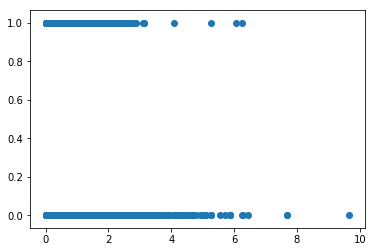

In [11]:
plt.scatter(spam.values[:, 11], spam.values[:, -1])

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [13]:
dt = DecisionTreeClassifier(max_depth=3)

In [14]:
X = spam.values[:, :57]
y = spam.values[:, -1]
dt.fit(X, y)
spamnames = spam.columns.tolist()[:57]
dot_data = export_graphviz(dt, out_file=None,
                          feature_names=spamnames,
                          class_names=['ham', 'spam'],
                          filled=True, rounded=True,
                          special_characters=True)

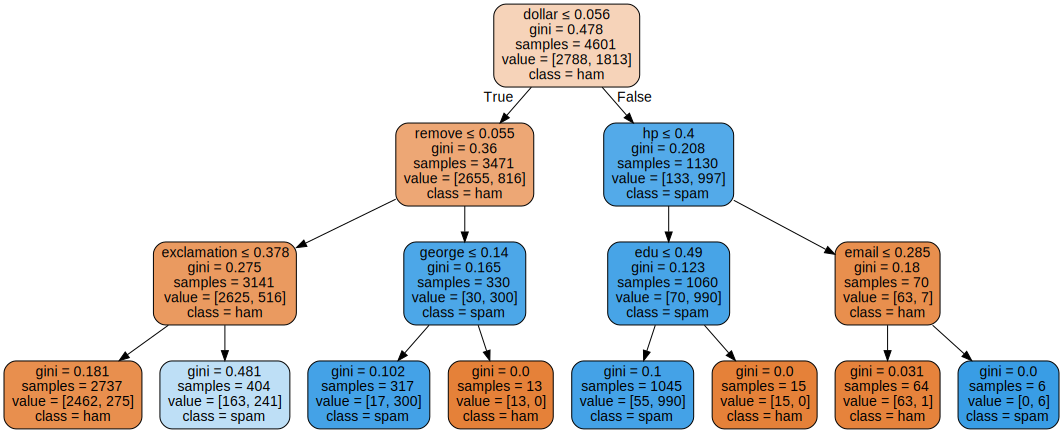

In [15]:
import graphviz
graph = graphviz.Source(dot_data)
graph

### We can say that the most important word in determining spam vs not spam is the word "dollar" because it's at the top of the tree above

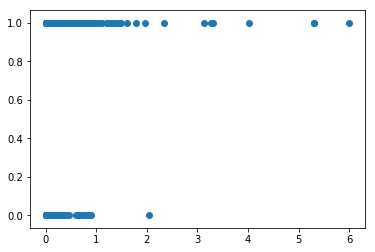

In [16]:
plt.scatter(spam['dollar'], spam.values[:, -1])

In [17]:
spam[['dollar', 'spam']].corr('pearson')

,dollar,spam
dollar,1.000000,0.323629
spam,0.323629,1.000000


In [18]:
spam[['address', 'spam']].corr('pearson')

,address,spam
address,1.000000,-0.030224
spam,-0.030224,1.000000


In [19]:
spam[['labs', 'spam']].corr('pearson')

,labs,spam
labs,1.000000,-0.171095
spam,-0.171095,1.000000


### Backed up with the correlation results above...

### You will overfit if your tree depth approaches the number of samples and gives way too many 'leaf' levels

- He is hinting towards using random forrest by saying we can use multiple decision trees to minimize variance

# Bagging

- Splitting the training set into multiple different training sets & building a model for each & average them out at the end for your predictor

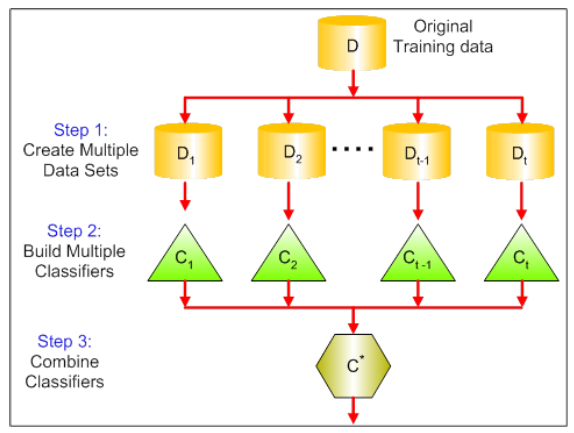

In [27]:
from IPython.display import Image
Image(filename=r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Week 6\Bagging.PNG") 

In [31]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=100, random_state=1)
bag.fit(X, y)
y_hat = bag.predict(X)
accuracy_score(y, y_hat)

0.9993479678330798

### Normally you should train/test split...

### Bagging/Boosting win most kaggle competitions
- If you've agreed you don't care about interpretation there is no reason to not use these methods

# Boosting

Hint:
- Think of a colony of a bunch of really simple objects contributing to a larger "swarm"
- Algorithms that do this is called "Boosting"
- Similar to Bagging in mission but the algorithm is different mathematically